# 감성분석 결과와 주가 데이터 비교

In [1]:
import pandas as pd

a = pd.read_csv("../data/project/predicted_레인보우로보틱스_2023_01.csv")
b = pd.read_csv("../data/project/predicted_레인보우로보틱스_2023_02.csv")
c = pd.read_csv("../data/project/predicted_레인보우로보틱스_2023_03.csv")
d = pd.read_csv("../data/project/predicted_레인보우로보틱스_2023_04.csv")
e = pd.read_csv("../data/project/predicted_레인보우로보틱스_2023_05.csv")
f = pd.read_csv("../data/project/predicted_레인보우로보틱스_2023_06.csv")
g = pd.read_csv("../data/project/predicted_레인보우로보틱스_2023_07.csv")
h = pd.read_csv("../data/project/predicted_레인보우로보틱스_2023_08.csv")
i = pd.read_csv("../data/project/predicted_레인보우로보틱스_2023_09.csv")
j = pd.read_csv("../data/project/predicted_레인보우로보틱스_2023_10.csv")
k = pd.read_csv("../data/project/predicted_레인보우로보틱스_2023_11.csv")
l = pd.read_csv("../data/project/predicted_레인보우로보틱스_2023_12.csv")

combined_df = pd.concat([a, b, c, d, e, f, g, h, i, j, k, l])

combined_df = combined_df.drop(columns=["Unnamed: 0"], errors="ignore")

combined_df.to_csv("../data/project/predicted_레인보우로보틱스_2023.csv", index=False)

## 감성분석 결과 데이터프레임

In [2]:
import koreanize_matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

months = ['1월', '2월', '3월', '4월', '5월', '6월',
           '7월', '8월', '9월', '10월', '11월', '12월']
company = "레인보우로보틱스"

sentiment_result = pd.read_csv("../data/project/predicted_레인보우로보틱스_2023.csv") # 감성분석 결과 csv파일 읽어오기
sentiment_result['date'] = pd.to_datetime(sentiment_result['date'])
sentiment_result['month'] = sentiment_result['date'].dt.month

sentiments_data = []

for index, row in sentiment_result.iterrows():
    month = row['month']
    prediction = row['prediction']
    score = row['score']
    sentiments_data.append([month, company, prediction, score])

sentiments_df = pd.DataFrame(sentiments_data, columns=['month', 'company', 'prediction', 'score'])
sentiments_df

,month,company,prediction,score
0,1,레인보우로보틱스,악재,5.377985
1,1,레인보우로보틱스,중립,5.830951
2,1,레인보우로보틱스,중립,5.846591
3,1,레인보우로보틱스,호재,5.946444
4,1,레인보우로보틱스,호재,5.830087
...,...,...,...,...
1448,12,레인보우로보틱스,중립,5.289628
1449,12,레인보우로보틱스,중립,3.605066
1450,12,레인보우로보틱스,중립,1.720393
1451,12,레인보우로보틱스,호재,6.125482


In [3]:
# 감성에 따른 가중치 매핑
weights = {'호재': 1, '악재': -1, '중립': 0}
sentiments_df['total'] = sentiments_df['prediction'].map(weights) * sentiments_df['score']
sentiments_df['month'] = sentiments_df['month'].astype(str) + '월'

df_monthly_total = sentiments_df.groupby(['month', 'company'])['total'].sum().unstack()
df_monthly_total = df_monthly_total.reindex(months)

df_monthly_total

company,레인보우로보틱스
month,
1월,474.813162
2월,244.127132
3월,617.190783
4월,267.495407
5월,109.331919
6월,160.497022
7월,92.051983
8월,57.829928
9월,423.361872


In [4]:
sentiments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       1453 non-null   object 
 1   company     1453 non-null   object 
 2   prediction  1453 non-null   object 
 3   score       1453 non-null   float64
 4   total       1453 non-null   float64
dtypes: float64(2), object(3)
memory usage: 56.9+ KB


## 감성분석 결과 시각화

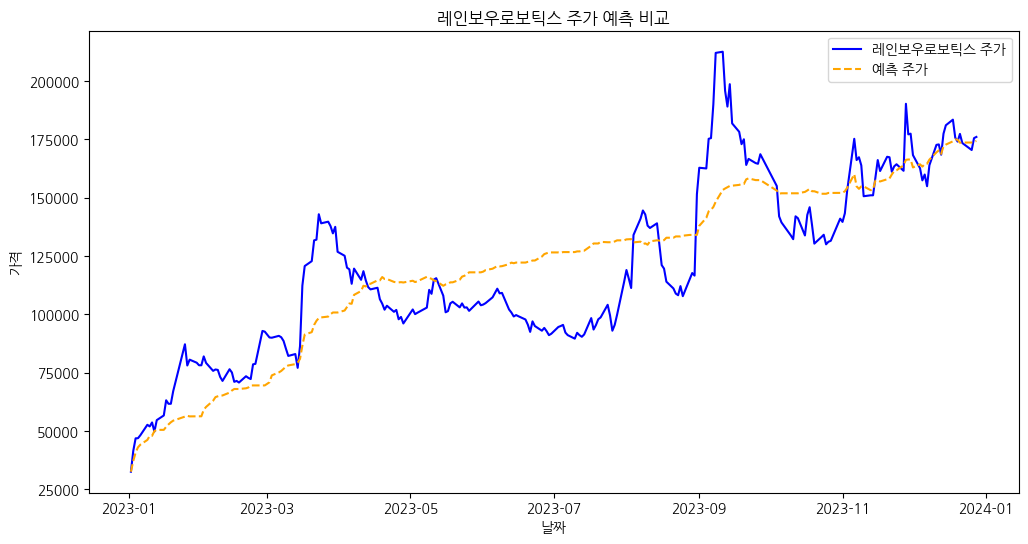

In [5]:
import random
import koreanize_matplotlib
from datetime import datetime, timedelta
import FinanceDataReader as fdr

company = "레인보우로보틱스"

sentiment_result = pd.read_csv("../data/project/predicted_레인보우로보틱스_2023.csv") # 감성분석 결과 csv파일 읽어오기

sentiment_result['date'] = pd.to_datetime(sentiment_result['date'])
sentiment_result["date"] = sentiment_result["date"].dt.date

sentiments_data = []

for index, row in sentiment_result.iterrows():
    date = row['date']
    prediction = row['prediction']
    score = row['score']
    sentiments_data.append([date, company, prediction, score])

sentiments_df2 = pd.DataFrame(sentiments_data, columns=['date', 'company', 'prediction', 'score'])

# 감성에 따른 가중치 매핑
weights = {'호재': 1, '악재': -1, '중립': 0}
sentiments_df2['total'] = sentiments_df2['prediction'].map(weights) * sentiments_df2['score']

df_rb = sentiments_df2.groupby(['date', 'company']).agg({'total': 'sum'}).reset_index()
df_rb['date'] = pd.to_datetime(df_rb['date'])
df_rb = df_rb.set_index('date')

# 주가 데이터에 감성분석 결과 총점 추가
rb_stock = fdr.DataReader('277810', '2023-01-01', '2023-12-31')
rb_stock['Sentiment_Total'] = df_rb['total']
rb_stock['Sentiment_Total'] = rb_stock['Sentiment_Total'].fillna(0)

# 감성분석 결과 scaling
scaling_factor = 58
rb_stock['Sentiment_Total'] = rb_stock['Sentiment_Total'] * scaling_factor

# 누적 합 계산
rb_stock['Sentiment_Total_Cumulative'] = rb_stock['Sentiment_Total'].cumsum()

# 오프셋 설정
offset = 32600
rb_stock['Sentiment_Total_Cumulative_Offset'] = rb_stock['Sentiment_Total_Cumulative'] + offset

plt.figure(figsize=(12, 6))
plt.plot(rb_stock['Close'], label='레인보우로보틱스 주가', color='blue')
plt.plot(rb_stock['Sentiment_Total_Cumulative_Offset'], label='예측 주가', linestyle='--', color='orange')
plt.title('레인보우로보틱스 주가 예측 비교')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.legend()
plt.show()

In [6]:
rb_stock

,Open,High,Low,Close,Volume,Change,Sentiment_Total,Sentiment_Total_Cumulative,Sentiment_Total_Cumulative_Offset
Date,,,,,,,,,
2023-01-02,34650,34950,32000,32600,537307,-0.053701,0.000000,0.000000,32600.000000
2023-01-03,37600,42350,35700,41550,12696270,0.274540,4624.666044,4624.666044,37224.666044
2023-01-04,42550,47350,41550,46900,7817245,0.128761,3573.151786,8197.817830,40797.817830
2023-01-05,46050,50200,45650,46950,5728586,0.001066,2250.127373,10447.945203,43047.945203
2023-01-06,46500,53600,46450,48200,6654312,0.026624,1128.886362,11576.831564,44176.831564
...,...,...,...,...,...,...,...,...,...
2023-12-21,172000,184300,170100,177300,881801,0.018966,-1303.158391,140934.972000,173534.972000
2023-12-22,179100,179300,172900,173400,309638,-0.021997,60.591585,140995.563585,173595.563585
2023-12-26,173000,173000,167600,170400,282521,-0.017301,0.000000,140995.563585,173595.563585


### 감성분석 결과 기반 경향선과 주가 데이터 최적경향선 비교

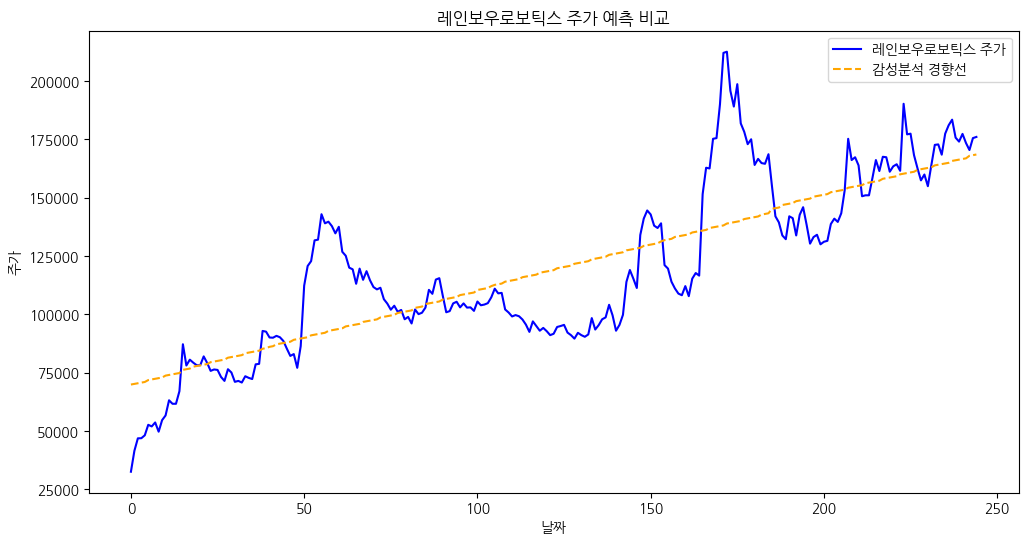

In [7]:
import FinanceDataReader as fdr
import seaborn as sns
import matplotlib.pyplot as plt

rb_stock = fdr.DataReader('277810', '2023-01-01', '2023-12-31')

# 감성분석 결과의 크기 scaling
scaling_factor = 58
df_rb['Sentiment_Total'] = df_rb['total'] * scaling_factor

rb_stock = rb_stock.sort_index()
df_rb = df_rb.sort_index()

# 날짜를 일로 나타내는 정수로 변환
rb_stock['Date_Integer'] = (rb_stock.index - rb_stock.index.min()).days
df_rb['Date_Integer'] = (df_rb.index - df_rb.index.min()).days

# 주식 데이터와 감성분석 결과 날짜기준 병합
merged_data = pd.merge(rb_stock, df_rb, left_on='Date_Integer', right_on='Date_Integer', how='left')

# 결측치 처리
merged_data['Sentiment_Total'] = merged_data['Sentiment_Total'].fillna(0)

# 감성분석 결과기반 1차 함수의 계수 및 y값 계산
coeff = np.polyfit(merged_data['Date_Integer'], merged_data['Sentiment_Total'].cumsum(), 1)
merged_data['Sentiment_Linear'] = np.polyval(coeff, merged_data['Date_Integer'])

# 오프셋 설정
offset = merged_data['Close'].mean() - merged_data['Sentiment_Linear'].iloc[len(merged_data) // 2]
merged_data['Sentiment_Linear_Offset'] = merged_data['Sentiment_Linear'] + offset

plt.figure(figsize=(12, 6))
plt.plot(merged_data['Close'], label='레인보우로보틱스 주가', color='blue')
plt.plot(merged_data['Sentiment_Linear_Offset'], label='감성분석 경향선', linestyle='--', color='orange')
plt.title('레인보우로보틱스 주가 예측 비교')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.show()


In [8]:
import pandas as pd
import cufflinks as cf
import numpy as np
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
cf.set_config_file(theme='pearl', world_readable=False)
cf.go_offline()
single_stock = fdr.DataReader('277810', '2023-01-01', '2023-12-31')
single_stock['Close'].iplot(title='레인보우로보틱스 최적경향선', bestfit=True, bestfit_colors=['blue']) # 수익률 시각화, bestfit:최적 경향선 추가(추세 파악 용이)

# 상관분석

In [9]:
rb_stock.index = pd.to_datetime(rb_stock.index)

# 월별 평균 수익률
monthly_avg_returns = rb_stock['Close'].resample('M').mean().pct_change()

print(monthly_avg_returns)

Date
2023-01-31         NaN
2023-02-28    0.290187
2023-03-31    0.442259
2023-04-30   -0.012676
2023-05-31   -0.041570
2023-06-30   -0.053650
2023-07-31   -0.035600
2023-08-31    0.292677
2023-09-30    0.448664
2023-10-31   -0.232883
2023-11-30    0.180786
2023-12-31    0.050418
Freq: M, Name: Close, dtype: float64


In [10]:
rb_stock

,Open,High,Low,Close,Volume,Change,Date_Integer
Date,,,,,,,
2023-01-02,34650,34950,32000,32600,537307,-0.053701,0
2023-01-03,37600,42350,35700,41550,12696270,0.274540,1
2023-01-04,42550,47350,41550,46900,7817245,0.128761,2
2023-01-05,46050,50200,45650,46950,5728586,0.001066,3
2023-01-06,46500,53600,46450,48200,6654312,0.026624,4
...,...,...,...,...,...,...,...
2023-12-21,172000,184300,170100,177300,881801,0.018966,353
2023-12-22,179100,179300,172900,173400,309638,-0.021997,354
2023-12-26,173000,173000,167600,170400,282521,-0.017301,358


In [11]:
company = "레인보우로보틱스"

sentiment_result = pd.read_csv("../data/project/predicted_레인보우로보틱스_2023.csv") # 감성분석 결과 csv파일 읽어오기
sentiment_result['date'] = pd.to_datetime(sentiment_result['date'])
sentiment_result['month'] = sentiment_result['date'].dt.month

sentiments_data = []

for index, row in sentiment_result.iterrows():
    
    month = row['month']
    prediction = row['prediction']
    score = row['score']
   
    sentiments_data.append([month, company, prediction, score])

sentiments_df = pd.DataFrame(sentiments_data, columns=['month', 'company', 'prediction', 'score'])

# 감성에 따른 가중치 매핑
weights = {'호재': 1, '악재': -1, '중립': 0}
sentiments_df['total'] = sentiments_df['prediction'].map(weights) * sentiments_df['score']
sentiments_df = sentiments_df.drop('company', axis=1)
sentiments_df = sentiments_df.rename(columns={'레인보우로보틱스': 'total'})
sentiments_df['month'] = sentiments_df['month'].astype(str) + '월'

# 'month' 기준 그룹화 및 합계
df_monthly_total = sentiments_df.groupby('month')['total'].sum().reset_index()

df_monthly_total['month'] = pd.Categorical(df_monthly_total['month'], categories=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'], ordered=True)
df_monthly_total = df_monthly_total.sort_values('month')
df_monthly_total = df_monthly_total.reset_index(drop=True)

# 월별 감성분석 변동
monthly_avg_total = df_monthly_total['total']
monthly_avg_total_diff = monthly_avg_total.pct_change()

print(monthly_avg_total_diff)


0          NaN
1    -0.485846
2     1.528153
3    -0.566592
4    -0.591276
5     0.467980
6    -0.426457
7    -0.371769
8     6.320809
9    -1.251807
10   -3.547848
11   -0.410752
Name: total, dtype: float64


In [12]:
sentiment_predicted_diff = monthly_avg_total_diff.tolist()
month_avg_gain = monthly_avg_returns.tolist()

if pd.isna(month_avg_gain[0]):
    month_avg_gain = month_avg_gain[1:]
    sentiment_predicted_diff = sentiment_predicted_diff[1:]

month_avg_gain

[0.2901873663914156,
 0.44225884576761754,
 -0.012676114023591034,
 -0.04156970111795577,
 -0.053649644965584775,
 -0.035599635858368006,
 0.2926768680445151,
 0.44866403296376545,
 -0.2328827375890684,
 0.18078611117868015,
 0.050418486385949146]

In [13]:
import numpy as np
import scipy.stats

# 두 리스트 간의 상관 계수 계산
correlation_coefficient, p_value = scipy.stats.pearsonr(sentiment_predicted_diff, month_avg_gain)

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Statistically significant correlation.")
else:
    print("No statistically significant correlation.")

Correlation Coefficient: 0.5250551967221427
P-value: 0.09722555034432241
No statistically significant correlation.


In [14]:
import pandas as pd

correlation_data = pd.DataFrame({'월별 평균 수익률 변동': month_avg_gain, '월별 감성분석 변동': sentiment_predicted_diff})

# 상관 행렬
correlation_matrix = correlation_data.corr()

print(correlation_matrix)

              월별 평균 수익률 변동  월별 감성분석 변동
월별 평균 수익률 변동      1.000000    0.525055
월별 감성분석 변동        0.525055    1.000000


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임에 인덱스 설정
index_months = [str(i) + '월' for i in range(2, 13)]
correlation_data.index = index_months

correlation_data


,월별 평균 수익률 변동,월별 감성분석 변동
2월,0.290187,-0.485846
3월,0.442259,1.528153
4월,-0.012676,-0.566592
5월,-0.041570,-0.591276
6월,-0.053650,0.467980
7월,-0.035600,-0.426457
8월,0.292677,-0.371769
9월,0.448664,6.320809
10월,-0.232883,-1.251807
11월,0.180786,-3.547848


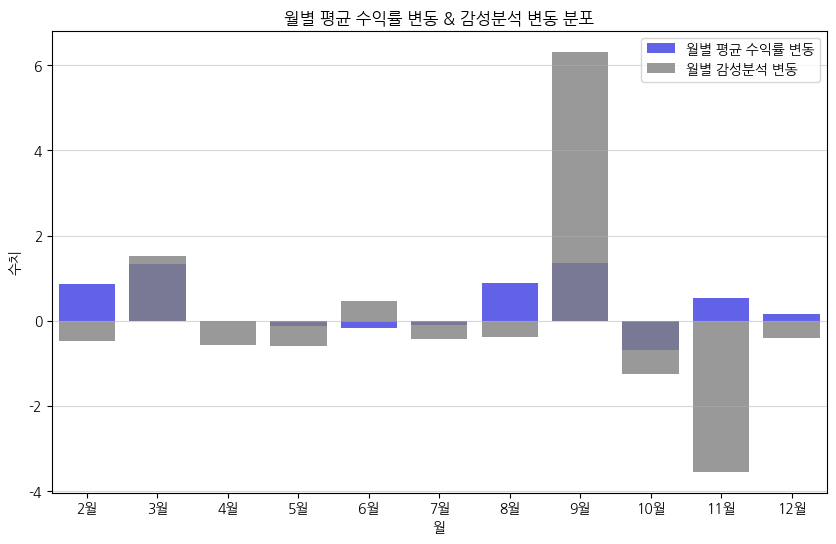

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 월별 평균 수익률 변동에 적절한 가중치 설정
correlation_data['월별 평균 수익률 변동'] = correlation_data['월별 평균 수익률 변동'] * 3

# 히스토그램
plt.figure(figsize=(10, 6))
plt.grid(axis='y', which='major', alpha=0.5)
sns.barplot(x=index_months, y='월별 평균 수익률 변동', data=correlation_data, alpha=0.7, label='월별 평균 수익률 변동', color='Blue')
sns.barplot(x=index_months, y='월별 감성분석 변동', data=correlation_data, alpha=0.8, label='월별 감성분석 변동', color = 'Gray')
plt.title('월별 평균 수익률 변동 & 감성분석 변동 분포')
plt.xlabel('월')
plt.ylabel('수치')
plt.legend()
plt.show()